In [3]:
#read data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
data_X, data_Y  = data.iloc[:,1:-1], data.iloc[:,-1:]      #not including ID. Keep data in order for cooresponding Y

print(f"Shape of raw data {data_X.shape}")

# test_data = pd.read_csv("house-prices-advanced-regression-techniques/test.csv").iloc[:,1:]
# test_X, test_Y  = test_data, pd.read_csv("house-prices-advanced-regression-techniques/sample_submission.csv")['SalePrice']

col_list = ['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']


print(f"train_X.shape[1] {data.shape[1]}, test_X.shape[1] {data.shape[1]}")

print(f"all_data.shape[1] {data_X.shape[1]}")

#currently, data has NaN
total_nan_count = pd.isna(data_X).sum().sum()
print(f"Total number of NaN values in the DataFrame: {total_nan_count}")

#fix the NaN
data_X[col_list] = data_X[col_list].fillna('No')
data_X = data_X.fillna(0)

#now, no NaN or blanks
total_nan_count = pd.isna(data_X).sum().sum()
print(f"Total number of NaN values in the DataFrame: {total_nan_count}")

#data_X.to_csv("data_X.txt", sep="\t", index=False)

#treat the month and year sold as a category 
#source https://www.kaggle.com/code/hobeomlee/prediction-stacked-regressions
data_X['MoSold'] = data_X['MoSold'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
data_X['YrSold'] = data_X['YrSold'].astype('str')

#do one-hot encoding
all_data_dummy = pd.get_dummies(data_X).astype(float)
#print(all_data_dummy.describe(include='all'))


train_X_raw, test_X_raw, train_Y, test_Y = train_test_split(all_data_dummy, data_Y, train_size=.8, random_state=0)

#standarize
scaler = StandardScaler()
train_X_stand = scaler.fit_transform(train_X_raw)
test_X_stand  = scaler.transform(test_X_raw)

#normalized data
from sklearn.preprocessing import normalize
train_X_norm = normalize(train_X_raw, axis=0)
test_X_norm = normalize(test_X_raw, axis=0)

#don't use val unless needed
#train_X_norm, val_X_norm, train_Y_norm, val_Y_norm = train_test_split(train_X_norm, train_Y_norm, train_size=.8, random_state=0)

#todo only use the validation set when tuning do not set at top level because linear regression needs all data
#train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, train_size=.8, random_state=0)
#print(clear_data.columns)


assert train_X_norm.shape[1] == train_X_norm.shape[1], print(f"train_X.shape[1] {train_X_norm.shape[1]}, test_X.shape[1] {train_X_norm.shape[1]}")
print(f"train_X_stand.shape {train_X_stand.shape}, test_X_stand.shape {test_X_stand.shape}")

# train_X.to_csv("train_X.txt", sep="\t", index=False)
# test_X.to_csv("test_X.txt", sep="\t", index=False)

total_nan_count = pd.isna(train_X_norm).sum().sum()
print(f"Total number of NaN values in the DataFrame: {total_nan_count}")
total_nan_count = pd.isna(test_X_norm).sum().sum()
print(f"Total number of NaN values in the DataFrame: {total_nan_count}")
# total_nan_count = pd.isna(val_X).sum().sum()
# print(f"Total number of NaN values in the DataFrame: {total_nan_count}")

# train_X.to_csv("train_X.txt", sep="\t", index=False)
# test_X.to_csv("test_X.txt", sep="\t", index=False)
# val_X.to_csv("val_X.txt", sep="\t", index=False)
#test_X = test_X.fillna('No')


assert train_X_stand.shape[1] == test_X_stand.shape[1], print(f"train_X.shape[1] {train_X_stand.shape[1]}, test_X.shape[1] {test_X_stand.shape[1]}")
assert test_X_stand.shape[0] == test_Y.shape[0] 


Shape of raw data (1460, 79)
train_X.shape[1] 81, test_X.shape[1] 81
all_data.shape[1] 79
Total number of NaN values in the DataFrame: 7829
Total number of NaN values in the DataFrame: 0
train_X_stand.shape (1168, 317), test_X_stand.shape (292, 317)
Total number of NaN values in the DataFrame: 0
Total number of NaN values in the DataFrame: 0


In [502]:
#convert to numpy
print(type(train_Y))
train_Y = train_Y.to_numpy()
#val_Y   = val_Y.to_numpy()
test_Y  = test_Y.to_numpy()

<class 'pandas.core.frame.DataFrame'>


In [503]:
print(type(train_Y))

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#normalized
lr = LinearRegression().fit(train_X_norm, train_Y)

y_pred = lr.predict(test_X_norm)
rmse = np.sqrt(mean_squared_error(test_Y, y_pred))
print(f"Root Mean Squared Error for normalized data (RMSE): {rmse:.2E}")

#standardized
lr = LinearRegression().fit(train_X_stand, train_Y)
# Make predictions
y_pred = lr.predict(test_X_stand)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_Y, y_pred))
print(f"Root Mean Squared Error for standardized data (RMSE): {rmse:.2E}")

print(type(train_Y))


<class 'numpy.ndarray'>
Root Mean Squared Error for normalized data (RMSE): 1.31E+18
Root Mean Squared Error for standardized data (RMSE): 6.29E+17
<class 'numpy.ndarray'>


In [504]:
#compare to just a average
y_pred = [train_Y.mean()] * len(train_Y)
rmse = np.sqrt(mean_squared_error(train_Y.flatten(), y_pred))
print(f"Baseline RMSE: {rmse:.2f}")

Baseline RMSE: 78466.30


The min RSME is 41417.29104034353 for 180 number of features


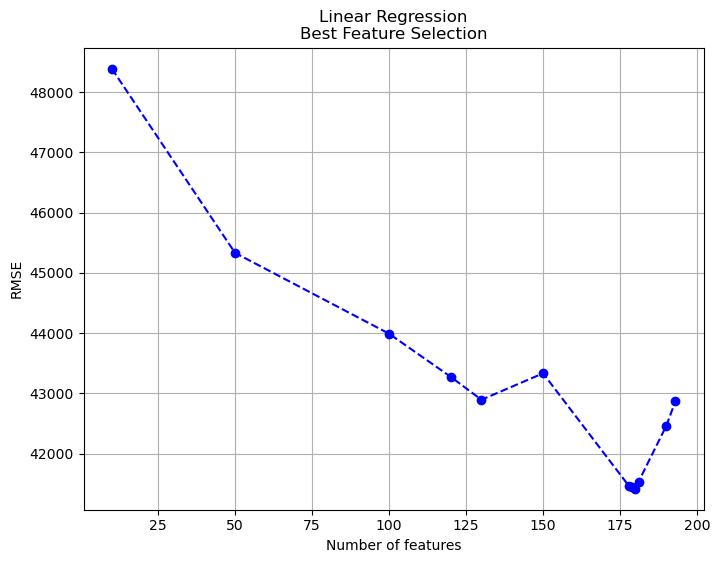

In [505]:
#picking features to do linear regression
#source https://machinelearningmastery.com/feature-selection-for-regression-data/

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt

def linear_regression_select(x_train, y_train, x_test, y_test, features):
    # feature selection
    #k is the number of top features
    
    rmse_list = []
    min_rmse = float('inf')
    min_features = 0

    for k in features:
        feature_selection = SelectKBest(score_func=f_regression, k=k)
        feature_selection.fit(x_train, y_train.flatten())

        train_X_tranformed = feature_selection.transform(x_train)
        test_X_tranformed  = feature_selection.transform(x_test)
        lr = LinearRegression().fit(train_X_tranformed, y_train.flatten())

        #print(f"For train size 100%, number of features: {k}")
        # np.savetxt(f"linear_regression_output/coef_{1}.txt", np.round(model.coef_, 1), delimiter=",")
        # print(f"model y-intercet: {model.intercept_}")
        y_pred = lr.predict(test_X_tranformed)

        #Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test.flatten(), y_pred))
        if rmse < min_rmse: 
            min_features = k
            min_rmse = rmse

        rmse_list.append(rmse)

    print(f"The min RSME is {min_rmse} for {min_features} number of features")

    # Create a plot
    plt.figure(figsize=(8, 6))
    plt.plot(features, rmse_list, marker="o", linestyle="--", color="b")
    #plt.yscale('log')
    plt.xlabel("Number of features")
    plt.ylabel("RMSE")
    plt.title("Linear Regression\nBest Feature Selection")
    plt.grid(True)
    plt.show()

feats = [10, 50, 100, 120, 130, 150, 178, 179, 180, 181, 190, 193] 
linear_regression_select(train_X_stand, train_Y, test_X_stand, test_Y, feats)

below didn't work

In [506]:
#remove constant features 
# using sklearn variancethreshold to find constant features

# from sklearn.feature_selection import VarianceThreshold
# sel = VarianceThreshold(threshold=0.1)
# sel.fit(train_X_stand)  # fit finds the features with zero variance

# # get_support is a boolean vector that indicates which features are retained
# # if we sum over get_support, we get the number of features that are not constant
# print(f"number of features that are not constant {sum(sel.get_support())}")
# print(f"num features {train_X_stand.shape}")
# # # print the constant features
# # print(
# #     len([
# #         x for x in train_X_stand.columns
# #         if x not in train_X_stand.columns[sel.get_support()]
# #     ]))
# mask = sel.get_support()
# false_indices = np.where(~mask)[0]
# print("Indices where the mask is False:", false_indices)

# # we can then drop these columns from the train and test sets
# train_X_trans = sel.transform(train_X_stand)
# test_X_trans = sel.transform(test_X_stand)

# #see how it did
# lr = LinearRegression().fit(train_X_trans, train_Y)
# y_pred = lr.predict(test_X_trans)
# rmse = np.sqrt(mean_squared_error(test_Y, y_pred))
# print(f"RMSE: {rmse:.2E}")

number of features that are not constant 312
num features (1168, 317)
Indices where the mask is False: [102 103 123 237 284]
RMSE: 6.22E+17


So we see that didn't work since we are already dropping those features value

For train size 0.01, number of features: 317
For train size 0.05, number of features: 317
For train size 0.1, number of features: 317
For train size 0.25, number of features: 317
For train size 0.5, number of features: 317
For train size 0.5, number of features: 317


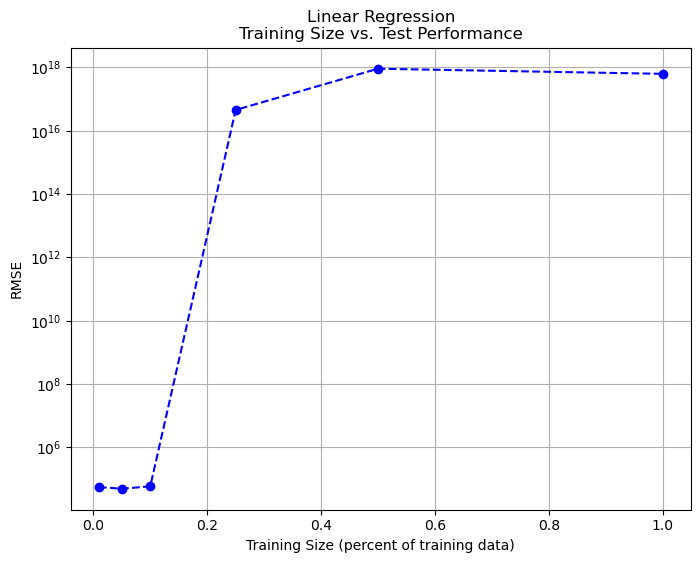

In [507]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

rmse_list = []

# Evaluate models with different training sizes
training_sizes = [0.01, 0.05, 0.1, 0.25, 0.5]
for size in training_sizes:
    X_train_small, _, y_train_small, _ = train_test_split(train_X_stand, train_Y, train_size=size, random_state=0)
    model = LinearRegression()
    model.fit(X_train_small, y_train_small)
    print(f"For train size {size}, number of features: {model.n_features_in_}")
    # np.savetxt(f"linear_regression_output/coef_{size}.txt", np.round(model.coef_, 1), delimiter=",")
    # print(f"model y-intercet: {model.intercept_}")
    y_pred = model.predict(test_X_stand)
    rmse = np.sqrt(mean_squared_error(test_Y, y_pred))
    rmse_list.append(rmse)

#100% of data. Do it apart from above since cannot split 100% of data
lr = LinearRegression().fit(train_X_stand, train_Y)
print(f"For train size {size}, number of features: {model.n_features_in_}")
# np.savetxt(f"linear_regression_output/coef_{1}.txt", np.round(model.coef_, 1), delimiter=",")
# print(f"model y-intercet: {model.intercept_}")
y_pred = lr.predict(test_X_stand)
# Calculate RMSE
rmse_list.append(np.sqrt(mean_squared_error(test_Y, y_pred)))
training_sizes.append(1)        #add the 100% 

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(training_sizes, rmse_list, marker="o", linestyle="--", color="b")
plt.yscale('log')
plt.xlabel("Training Size (percent of training data)")
plt.ylabel("RMSE")
plt.title("Linear Regression\nTraining Size vs. Test Performance")
plt.grid(True)
plt.show()

In [ ]:
def normalize(column):
    return (column - column.min()) / (column.max() - column.min())
normalized_data = data.apply(normalize)
